## Engaging Complexity
### Quiz 3

#### Github link:  https://github.com/DariusTata/engagingcomplexity


_1. (4 points) The 1-dimensional cellular automata is a cellular automata where the current state is only one dimension and where each cell is either black or white. The next state is determined by the state of the cell above and it's neighbours as ditated by the rules. The neighbourhood includes the adjacent cells._  

_Program a simulation in Python that runs 20 iterations of the 1-dimensional cellular automata with the rule shown below. Plot your results._

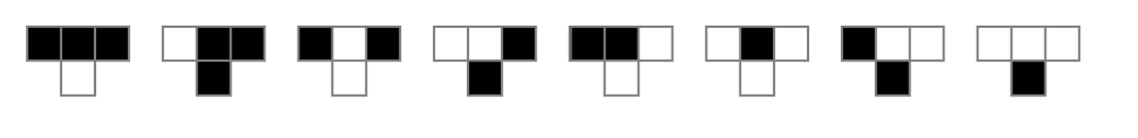

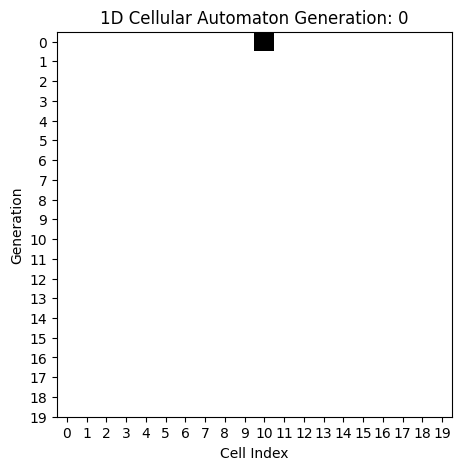

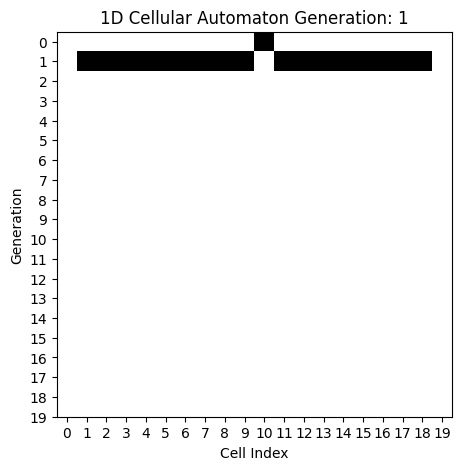

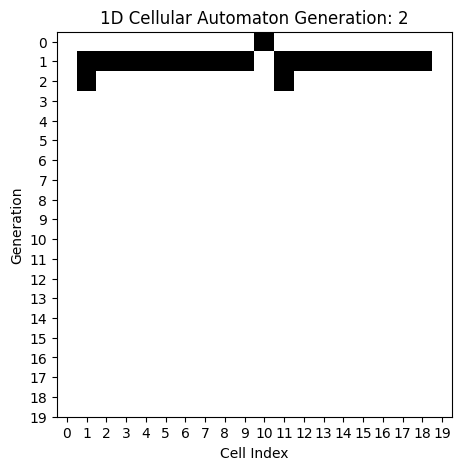

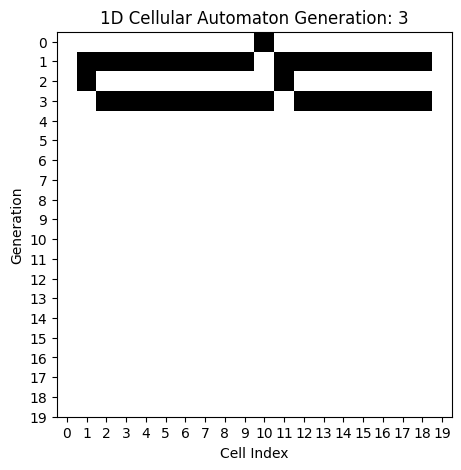

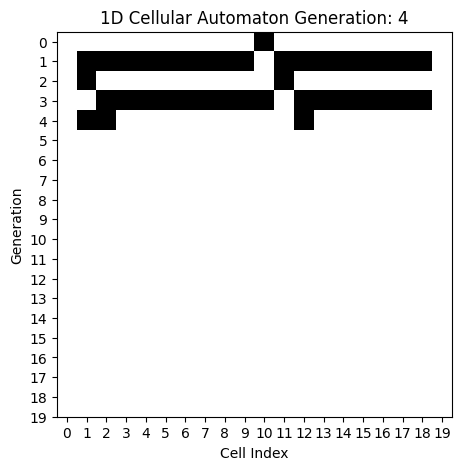

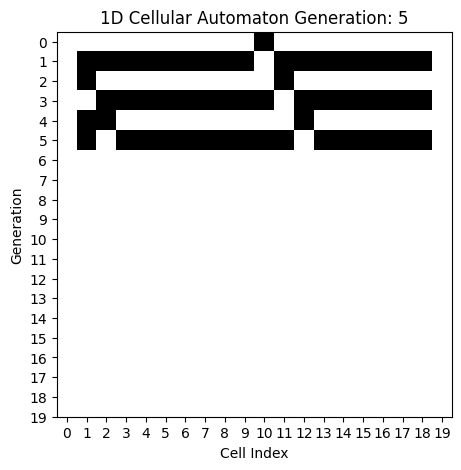

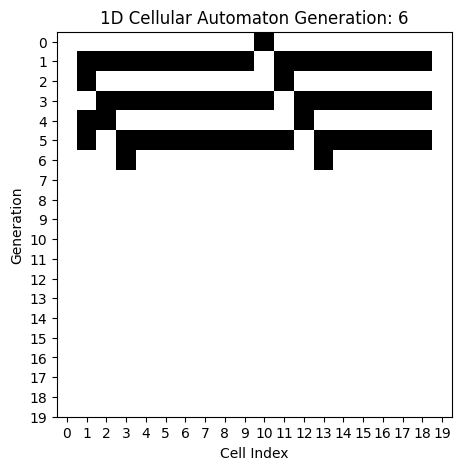

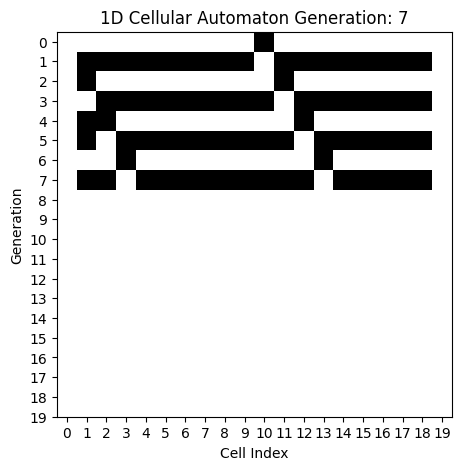

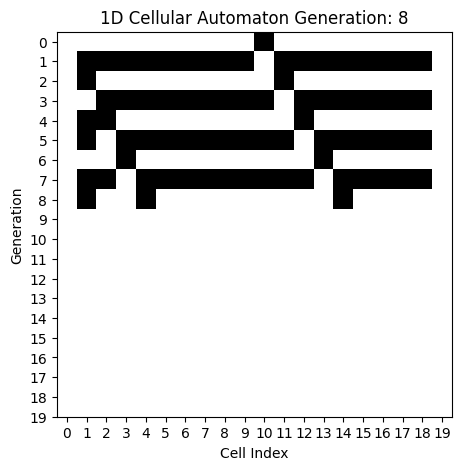

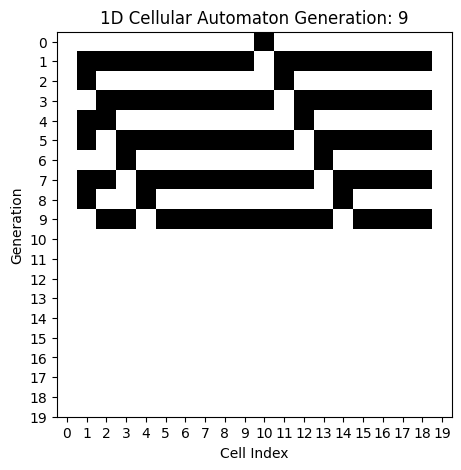

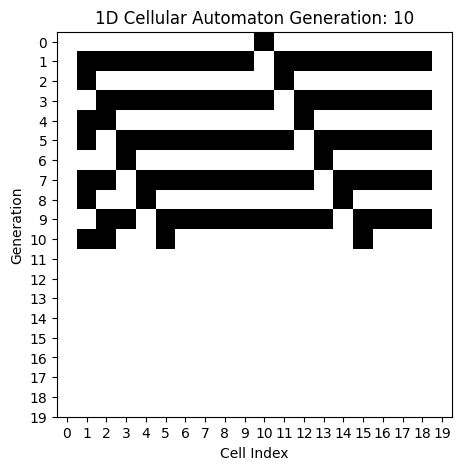

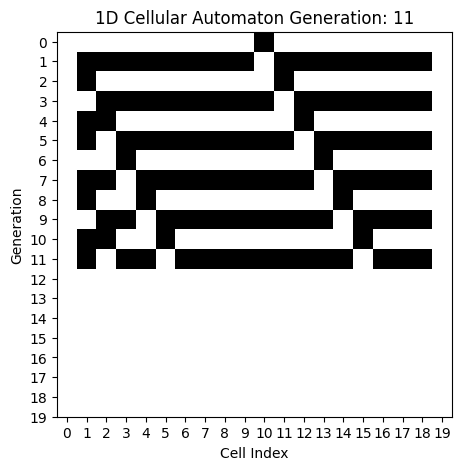

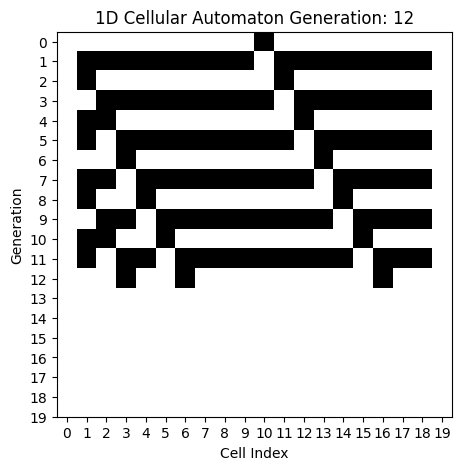

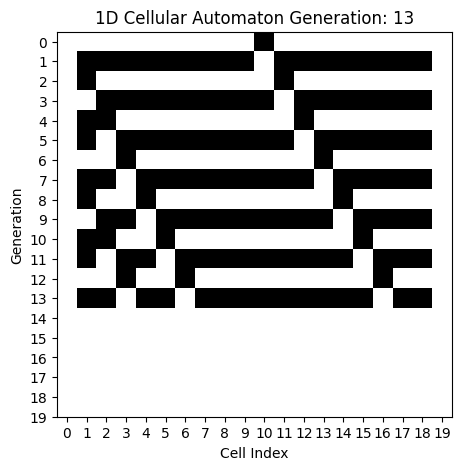

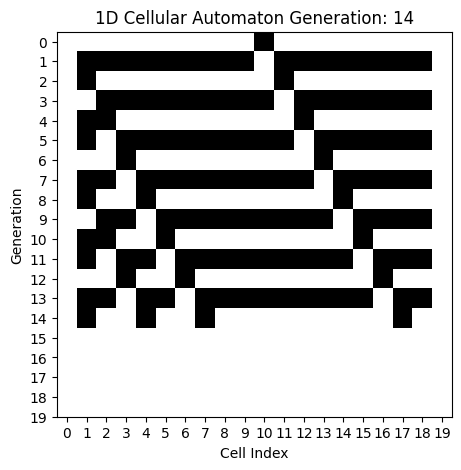

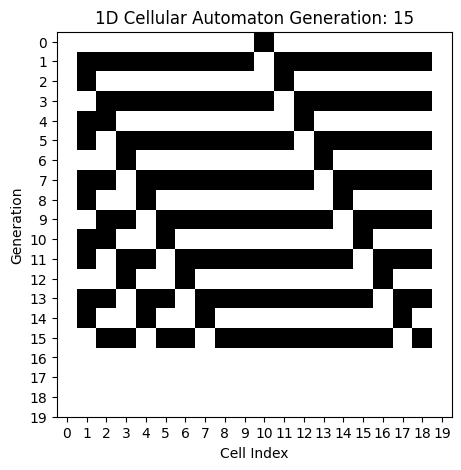

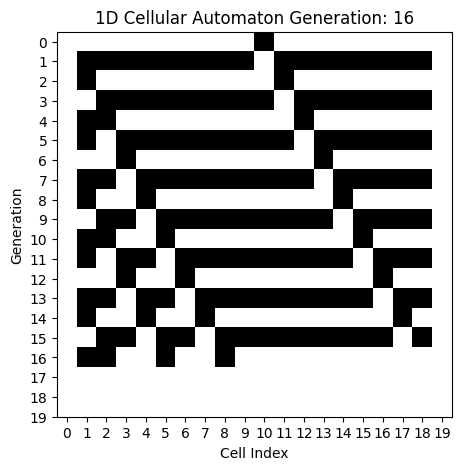

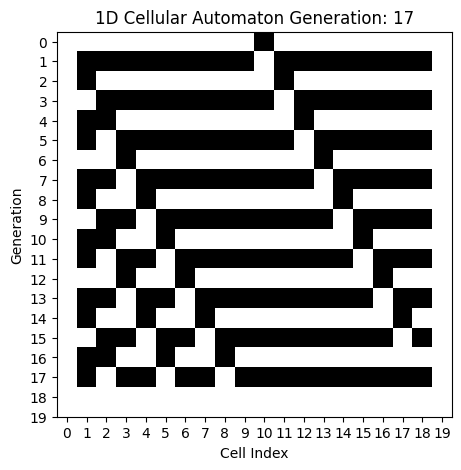

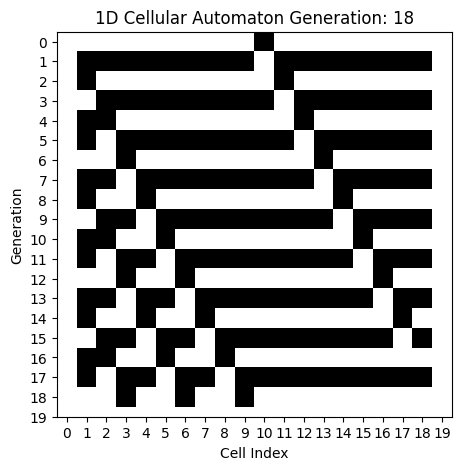

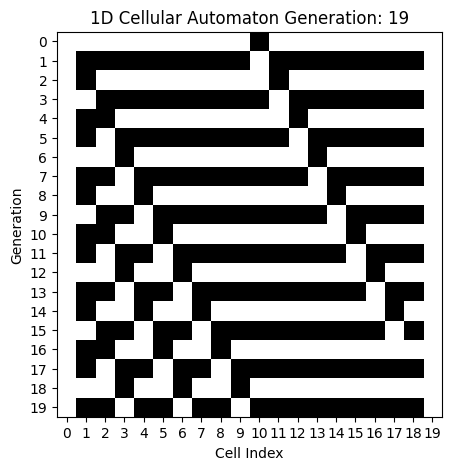

Simulation finished


In [19]:
import numpy as np
import matplotlib.pyplot as plt

#Simulates 1D cellular automaton
def cellular_automaton(width, gens):
    #Initialize the grid with zeroes
    grid = np.zeros((gens, width), dtype=int)
    #Start with a single alive cell in the middle of the first row
    grid[0, width // 2] = 1
    
    #New rule for 1d automata.
    #The target cell alive status no longer depenendent only upon number of alive
    # neighbours per original code by Corey Woodward. Alive state AND position 
    # of alive state are both required to determine target cell status.
    #
    #If L+C+R, L+R, L+C, or C are filled then the target cell is dead.
    #If its any of the other combinations, then the target cell is alive.
    def fixed_rule(n_hood):
        if n_hood == (1, 1, 1):
            return 0
        elif n_hood == (1, 0, 1): 
            return 0
        elif n_hood == (1, 1, 0):
            return 0
        elif n_hood == (0, 1, 0):
            return 0
        else:
            return 1
    
    #perform the next (L,C,R) evaluation
    for i in range(1, gens):
        for j in range(1, width - 1):  #Avoid the boundaries
            #set the neighbourhood cells to the three cells above the target cell
            n_hood = tuple(grid[i - 1, j - 1:j + 2])
            #set the value of the cell at co-ordinates corresponding to the width and
            # generation for-loops to the result of the fixed_rule function
            grid[i, j] = fixed_rule(n_hood)

    return grid

# Display the grid
def display_grid(grid, gen):
    plt.figure(figsize=(10, 5))
    plt.imshow(automaton, cmap="binary", interpolation="nearest")
    plt.title(f"1D Cellular Automaton Generation: {gen-1}")
    plt.xticks(range(width))
    plt.yticks(range(gens))
    plt.xlabel("Cell Index")
    plt.ylabel("Generation")
    plt.show()

#Starting Parameters
width = 20  #Width of the grid, count starts at zero
gens = 20  #Number of generations, count starts at zero

#Run the simulation
for gen in range(1,gens+1):
    automaton = cellular_automaton(width, gen)
    display_grid(automaton, gen)

print("Simulation finished")

_2. (6 points) The figure below shows part of a sequence $S_1$, $S_2$, $S_3$, ... of model snowflakes, based on squares (in the prep you saw one based on triangles). The first term $S_1$ consists of a single square of side a. To obtain $S_2$, the middle third of each edge is replaced with a new square, of side $a/3$, as shown in the figure. Subsequent terms are obtained by replacing the middle third of each external edge of a new square formed in the previous snowflake, by a square 3 of the size, as illustrated by $S_3$ in the figure._  

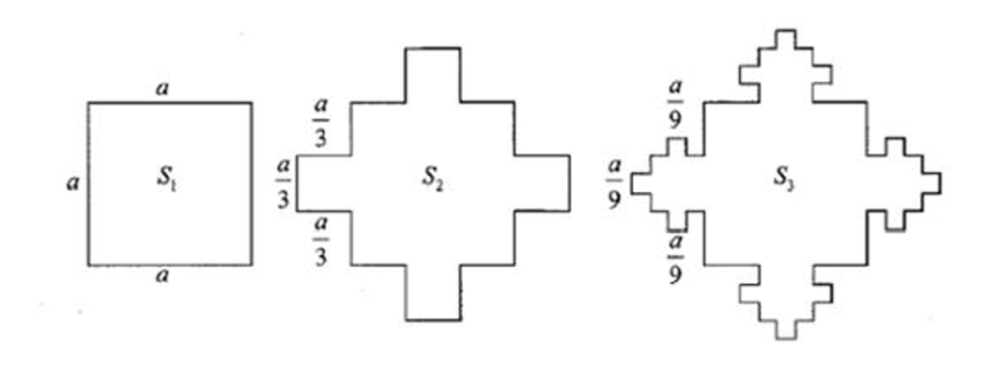

_(a) Deduce that to form $S_4$, 36 new squares of side must be added to $S_3$.  
(b) Demonstrate that the perimeters of $S_2$ and $S_3$ are $20a/3$ and $28a/3$ respectively.  
(c) Find the perimeter of $S_n$.  
(d) Describe what happens to the perimeter of $S_n$ as $n$ increases.  
(e) Find the areas of $S_1$, $S_2$ and $S_3$.  
(f) Find the smallest value of the constant $S$ such that the area of $S_n$ is strictly less than $S$, for all values of $n$._

**a)**  
* For sequence term $n$, the length of a new emerging side is $a/3^{n-1}$.
* Each new term has three new sides emerge from the sides generated in the previous term. This could be represented as: 

| $S_n$ | Number of New Squares | Number of New squares (factorised) |
|-------|-----------------------|------------------------------------|
| $S_2$ | 4 | $2^2 \cdot 3^0$ |
| $S_3$ | 12 | $2^2 \cdot 3^1$ |
| $S_4$ | 36 | $2^2 \cdot 3^2$ |

Hence, for $S_4$:
  
* new side length is $a/3^3 = a/27$
  
* number of new squares is $2^2 \cdot 3^2 = 36$

**b)**  
| $S_n$ | One Side Increase | Perimeter Increase | Perimeter Total |
|-------|-------------------|--------------------|-----------------|
| $S_2$ | $2a/3$ | $4 \cdot 2a/3^1$ | $4 \cdot (S_1 + S_2)$|
| $S_3$ | $2a/3^2$ | $4 \cdot 2a/3^2$ |$4 \cdot (S_1 + S_2 + S_3)$ |
| $S_4$ | $2a/3^3$ | $4 \cdot 2a/3^3$ |$4 \cdot (S_1 + S_2 + S_3 + S_4)$ |

Let $P_n$ be the perimeter for $S_n$  
$S_2 = S_1 + 2a/3^{1} = a + 2a/3 = 5a/3$  
$P_2 = 4 \cdot S_2 = 4 \cdot (5a/3) = 20a/3$  

 
$S_3 = S_2 + 2a/3^{2} = a + 2a/3 + 2a/9 = 9a/9 + 6a/9 + 2a/9 = 17a/9$
$P_3 = 4 \cdot S_3 = 4 \cdot (17a/9) = 68a/9$  

This is confusing as the question indicates $P_3$ should be $28a/3$.  
Let's try to solve algorithmically instead:

In [20]:
from fractions import Fraction

In [21]:
#function for next term in the sequence describing one of the inital four sides.
#I am using fractions because the decimals are irrational. It also saves from
# rounding and feels more intuitive if the value for 'a' changes.
#I have assumed a = 1 
def snowflake_side(n):
    if n<1:
        print('out of bounds, n is less than 1')
        return(float('nan'))
    elif n==1:
        #print('at term 1 the increase is 1')
        return(n)
    else:
        increase = Fraction(2,3**(n-1))
        #print('at term',n,'the increase is',increase)
        return(increase+snowflake_side(n-1)) #recursion!

In [22]:
#The perimeter is the sum of the four identical sides
def snowflake_perimeter(side_size):
    return(4*side_size)

In [23]:
#iterate for P_2 and P_3
for i in range(2,4):
    print('The perimeter of Term',i,'is',snowflake_perimeter(snowflake_side(i)))

The perimeter of Term 2 is 20/3
The perimeter of Term 3 is 68/9


This matches my algebra above. Maybe the question paper is wrong?

**c)**  
from my table in **(b)**, the side increase is $2a/3^{n-1}$.  
Therefore, for a given $n$:  

$S_n = S_{n-1} + 2a/3^{n-1}$  
  
where n is the term number above 1.  

Additionally:  

$Perimeter_n = 4 \cdot S_n$

**d)**  
The relationship between $P_n$ (Perimeter at term n) and $S_n$ (Side at term n) is directly proportional by a factor of 4.

In [24]:
#This is probably not 'good practice' but I want to see if we can convert the fraction
# back into a float.

def fraction_to_float(input_fraction):
    #local variables to convert fraction to string and then split the string at the
    # division "\" character
    z = str(input_fraction)
    y = z.split('/')
    if int(y[-1])==0:
        print('error: divide by zero!')
        return(int(y[0]))
    else:
        floating = (int(y[0]))/(int(y[1]))
        return(floating)

In [25]:
#let's see what happens to S_n as we iterate through n
for i in range(2,50):
    print('S Term',i,'is',fraction_to_float(snowflake_side(i)))

S Term 2 is 1.6666666666666667
S Term 3 is 1.8888888888888888
S Term 4 is 1.962962962962963
S Term 5 is 1.9876543209876543
S Term 6 is 1.9958847736625513
S Term 7 is 1.9986282578875172
S Term 8 is 1.9995427526291725
S Term 9 is 1.999847584209724
S Term 10 is 1.9999491947365746
S Term 11 is 1.9999830649121915
S Term 12 is 1.9999943549707304
S Term 13 is 1.9999981183235769
S Term 14 is 1.9999993727745256
S Term 15 is 1.999999790924842
S Term 16 is 1.9999999303082807
S Term 17 is 1.999999976769427
S Term 18 is 1.9999999922564757
S Term 19 is 1.9999999974188252
S Term 20 is 1.9999999991396085
S Term 21 is 1.9999999997132027
S Term 22 is 1.999999999904401
S Term 23 is 1.9999999999681337
S Term 24 is 1.9999999999893778
S Term 25 is 1.9999999999964593
S Term 26 is 1.9999999999988198
S Term 27 is 1.9999999999996065
S Term 28 is 1.9999999999998688
S Term 29 is 1.9999999999999563
S Term 30 is 1.9999999999999853
S Term 31 is 1.9999999999999951
S Term 32 is 1.9999999999999984
S Term 33 is 1.999999

* As $n$ becomes large, $S_n$ converges towards $2a$ asymptotically.  
* Hence, as $n$ becomes large, $P_n$ converges towards $8a$ asymptotically.

**e)**  
Let $A_n$ be the area for $S_n$.  
Using my answer from **(c)**( $S_n = S_{n-1} + 2a/3^{n-1}$ ) I can create a formula for $A_n$.  
The difference between any two neighbouring terms in the sequence ($S_n$ and $S_{n-1}$) in given by $2a/3^{n-1}$. As the sequence progresses, a new square extrudes from a previously flush side. This increase in side length is only due to two new sides, when a side goes from a flat line to a new protruding square. Therefore the area of the new extrusion is given by:  
$A_n = A_{n-1} + (1/2 \cdot 2a/3^{n-1})^{2}$  
$A_n = A_{n-1} + (a/3^{n-1})^{2}$  
  
$A_1 = A_{0} + (a/3^{0})^{2}$  
$A_1 = a^{2}$ ; assuming $A_0 = 0$  

$A_2 = A_{1} + (a/3^{1})^{2}$  
$A_2 = a^{2} + a^{2}/9 = 9a^{2}/9 + a^{2}/9$  
$A_2 = 10a^{2}/9$

$A_3 = A_{2} + (a/3^{2})^{2} = 10a^{2}/9 + (a/9)^{2}$  
$A_3 = 10a^{2}/9 + a^{2}/81 = 90a^{2}/81 + a^{2}/81$  
$A_3 = 91a^{2}/81$  

* $A_1$ = $a^2$
* $A_2$ = $10/9 \cdot a^2$
* $A_3$ = $91/81 \cdot a^2$

**f)**  
Generalising my answer from **(d)** so that it is coherent with the general sequence term gives: $S_n < 2a$